<a href="https://colab.research.google.com/github/liverodip/ML/blob/main/%D0%B8%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%BE%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание:

Представлены данные по СПО и ВО в  Российской Федерации
Используйте изученные методы машинного обучения, ответьте на вопросы.
1. Можно ли утверждать, что численность студентов среднего образования статистически значимо зависит от следующих показателей:
Средней начисленной заработной платы; Численностью работоспособного населения; Удельный вес занятого населения со средним профессиональным образованием. Выбрать метод МО, позволяющий ответить на данный вопрос, оценить модель, обосновать ответ используя статистические показатели. Можно ли использовать показатель "численность населения"?
2. Можно ли утверждать, что  города федерального значения отличаются от других регионов РФ? .
Выбрать метод МО, позволяющий ответить на данный вопрос, оценить, обосновать ответ . Подсказка: для второго вопроса может быть использовано 3 варианта МО и не менее 4х моделей.
Результат представить в форме развернутого пояснения, обозначениями и выводами (строка комментов в коде)
Код на python для анализа продемонстрировать преподавателю.



Обозначения:
  Wages - Средняя начисленная заработная плата.

  WorkAge - Численность трудоспособного населения.

  SecEdu - Удельный вес занятого населения со средним профессиональным образованием.

  Popul - численность населения.

  Для анализа зависимости между переменными можно воспользоваться линейной регрессией.
  
  Этот метод позволяет:
  Оценить влияние каждого предиктора на целевую переменную.
  Проверить статистическую значимость предикторов с помощью p-values.
  Оценить качество модели с помощью коэффициента детерминации ( R^2 ).

In [ ]:

import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Чтение Excel файла
try:
    df = pd.read_excel('dann.xlsx')
except FileNotFoundError:
    print("Файл не найден.")
    exit()
except Exception as e:
    print(f"Произошла ошибка при чтении файла: {e}")
    exit()


In [ ]:
from IPython.display import display

display(df)


,Region,Wages,HighEdu,SecEdu,SecStudent,HighStudent,University,Popul,WorkAge
0,Алтайский край,33872,27.8,46.2,185,225,17,2282.3,1262.11
1,Амурская область,59098,27.4,48.3,238,185,6,777.2,455.44
2,Архангельская область,57979,27.3,56.4,179,161,7,1076.2,603.75
3,Астраханская область,42096,35.3,45.0,251,287,13,993.6,558.40
4,Белгородская область,41775,33.7,49.8,206,304,11,1536.6,874.33
...,...,...,...,...,...,...,...,...,...
80,Чеченская Республика,31291,39.2,32.6,183,222,4,1507.2,866.64
81,Чувашская Республика,35799,31.8,45.2,214,287,10,1203.2,681.01
82,Чукотский автономный округ,130738,36.5,54.8,140,19,1,49.8,31.87
83,Ямало-Ненецкий автономный округ,116376,44.9,40.3,153,4,1,549.6,353.94


In [ ]:
# Проверка на пропущенные значения и обработка
print("Информация о датафрейме:")
print(df.info())

Информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Region       85 non-null     object 
 1   Wages        85 non-null     int64  
 2   HighEdu      85 non-null     float64
 3   SecEdu       85 non-null     float64
 4   SecStudent   85 non-null     int64  
 5   HighStudent  85 non-null     int64  
 6   University   85 non-null     int64  
 7   Popul        85 non-null     float64
 8   WorkAge      85 non-null     float64
dtypes: float64(4), int64(4), object(1)
memory usage: 6.1+ KB
None


In [ ]:
# Предикторы
X = df[['Wages', 'SecEdu',  'WorkAge']]

# Целевая переменная
y = df['SecStudent']

In [ ]:
# Добавление константы для statsmodels
X = sm.add_constant(X)

In [ ]:
# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Модель statsmodels
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             SecStudent   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.9406
Date:                Fri, 24 Jan 2025   Prob (F-statistic):              0.426
Time:                        10:29:22   Log-Likelihood:                -327.81
No. Observations:                  68   AIC:                             663.6
Df Residuals:                      64   BIC:                             672.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        195.2369     28.965      6.740      0.0

In [ ]:
# Модель sklearn для R-squared
model_sklearn = LinearRegression()
model_sklearn.fit(X_train, y_train)
y_pred = model_sklearn.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.048160659809842854


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def resolve_regression(X, y, regularization=None):

    # Разделение данных на обучающую и тестовую выборки (80% / 20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Инициализация модели в зависимости от типа регуляризации
    if regularization == 'l1':
        model = Lasso() # L1-регуляризация (Lasso)
    elif regularization == 'l2':
        model = Ridge() # L2-регуляризация (Ridge)
    else:
        model = LinearRegression() # Линейная регрессия без регуляризации

    # Обучение модели
    model.fit(X_train, y_train)

    # Предсказание на тестовой выборке
    y_pred = model.predict(X_test)

    # Вычисление метрик качества
    mae = mean_absolute_error(y_test, y_pred) # Средняя абсолютная ошибка
    r2 = r2_score(y_test, y_pred)             # Коэффициент детерминации (R^2)

    # Вывод результатов
    print(f"Regularization: {regularization}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R^2 Score: {r2:.2f}")

    return model, X_train, X_test, y_train, y_test

In [ ]:
resolve_regression(X, y)
None

Regularization: None
Mean Absolute Error (MAE): 21.23
R^2 Score: 0.05


 Можно ли использовать показатель "численность населения"? Можно :)

2 *Задание*

Можно ли утверждать, что города федерального значения отличаются от других регионов РФ? . Выбрать метод МО, позволяющий ответить на данный вопрос, оценить, обосновать ответ . Подсказка: для второго вопроса может быть использовано 3 варианта МО и не менее 4х моделей. Результат представить в форме развернутого пояснения, обозначениями и выводами (строка комментов в коде) Код на python для анализа продемонстрировать преподавателю.

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
from IPython.display import display

display(df)

,Region,Wages,HighEdu,SecEdu,SecStudent,HighStudent,University,Popul,WorkAge
0,Алтайский край,33872,27.8,46.2,185,225,17,2282.3,1262.11
1,Амурская область,59098,27.4,48.3,238,185,6,777.2,455.44
2,Архангельская область,57979,27.3,56.4,179,161,7,1076.2,603.75
3,Астраханская область,42096,35.3,45.0,251,287,13,993.6,558.40
4,Белгородская область,41775,33.7,49.8,206,304,11,1536.6,874.33
...,...,...,...,...,...,...,...,...,...
80,Чеченская Республика,31291,39.2,32.6,183,222,4,1507.2,866.64
81,Чувашская Республика,35799,31.8,45.2,214,287,10,1203.2,681.01
82,Чукотский автономный округ,130738,36.5,54.8,140,19,1,49.8,31.87
83,Ямало-Ненецкий автономный округ,116376,44.9,40.3,153,4,1,549.6,353.94


In [ ]:
# У нас есть следующие столбцы:
# 'Region' - тип региона (Федеральный или Региональный)
# 'Wages' - среднемесячная заработная плата
# 'HighEdu' - удельный вес занятого населения с высшим образованием
# 'SecEdu' - удельный вес занятого населения со средним профессиональным образованием
# 'SecStudent' - численность студентов по программам СПО на 10000 человек
# 'HighStudent' - численность студентов по программам высшего образования на 10000 человек
# 'University' - число организаций высшего образования
# 'Popul' - среднегодовая численность населения
# 'WorkAge' - численность населения в трудоспособном возрасте

In [ ]:
print("Количество пропущенных значений в Wages:", df['Wages'].isnull().sum())

Количество пропущенных значений в Wages: 0


In [ ]:
print("Уникальные значения в столбце Region:")
print(df['Region'].unique())

Уникальные значения в столбце Region:
['Алтайский край' 'Амурская область' 'Архангельская область'
 'Астраханская область' 'Белгородская область' 'Брянская область'
 'Владимирская область' 'Волгоградская область' 'Вологодская область'
 'Воронежская область' 'г. Москва' 'г. Санкт-Петербург' 'г. Севастополь'
 'Еврейская автономная область' 'Забайкальский край' 'Ивановская область'
 'Иркутская область' 'Кабардино-Балкарская Республика'
 'Калининградская область' 'Калужская область' 'Камчатский край'
 'Карачаево-Черкесская Республика' 'Кемеровская область'
 'Кировская область' 'Костромская область' 'Краснодарский край'
 'Красноярский край' 'Курганская область' 'Курская область'
 'Ленинградская область' 'Липецкая область' 'Магаданская область'
 'Московская область' 'Мурманская область' 'Ненецкий автономный округ'
 'Нижегородская область ' 'Новгородская область' 'Новосибирская область '
 'Омская область' 'Оренбургская область' 'Орловская область'
 'Пензенская область' 'Пермский край' 'Примор

In [ ]:
# Создание бинарного признака для федеральных городов
federal_cities = ['г. Москва', 'г. Санкт-Петербург', 'г. Севастополь']
df['is_federal'] = df['Region'].apply(lambda x: 1 if x in federal_cities else 0)

In [ ]:
print("Количество федеральных городов (is_federal == 1):", df['is_federal'].sum())

Количество федеральных городов (is_federal == 1): 3


In [ ]:
#Получение выборок заработной платы
federal_wages = df[df['is_federal'] == 1]['Wages'].dropna()  # Удаляем NaN
regional_wages = df[df['is_federal'] == 0]['Wages'].dropna()  # Удаляем NaN

In [ ]:
# Проверка на количество данных в выборках
print(f"Количество заработной платы федеральных городов: {len(federal_wages)}")
print(f"Количество заработной платы регионов: {len(regional_wages)}")

Количество заработной платы федеральных городов: 3
Количество заработной платы регионов: 82


In [ ]:
# 1 Тесты на различия
federal_wages = df[df['is_federal'] == 1]['Wages'].dropna()  # Удаляем NaN
regional_wages = df[df['is_federal'] == 0]['Wages'].dropna()  # Удаляем NaN
# Проверка на пустые наборы данных
if federal_wages.empty:
    print("Нет данных для федеральных городов.")
else:
    print(f"Заработная плата федеральных городов: {federal_wages.describe()}")

if regional_wages.empty:
    print("Нет данных для регионов.")
else:
    print(f"Заработная плата регионов: {regional_wages.describe()}")


Заработная плата федеральных городов: count         3.000000
mean      76390.666667
std       36311.679035
min       40145.000000
25%       58202.000000
50%       76259.000000
75%       94513.500000
max      112768.000000
Name: Wages, dtype: float64
Заработная плата регионов: count        82.000000
mean      48664.634146
std       20106.164754
min       31291.000000
25%       36154.250000
50%       41466.000000
75%       50735.000000
max      130738.000000
Name: Wages, dtype: float64


In [ ]:
# t-тест
if not federal_wages.empty and not regional_wages.empty:
    t_stat, p_value_ttest = stats.ttest_ind(federal_wages, regional_wages)
    print(f"T-test: t_stat={t_stat}, p_value={p_value_ttest}")
 # 2 U-тест Манна-Уитни
    u_stat, p_value_u_test = stats.mannwhitneyu(federal_wages, regional_wages)
    print(f"U-test: u_stat={u_stat}, p_value={p_value_u_test}")
else:
    print("Не удалось провести тесты из-за недостатка данных.")


T-test: t_stat=2.28451442307732, p_value=0.024893960298917883
U-test: u_stat=185.0, p_value=0.15079477574162192


In [ ]:
# 3 Регрессионный анализ
X = df[['is_federal', 'HighEdu', 'SecEdu', 'SecStudent', 'HighStudent', 'University', 'Popul', 'WorkAge']].dropna()
y = df['Wages'].dropna()

# Убедимся, что X и y имеют одинаковую длину
X = X.loc[y.index]  # Синхронизируем индексы

if not X.empty and not y.empty:
    model = sm.OLS(y, sm.add_constant(X)).fit()
    print(model.summary())
else:
    print("Не удалось провести регрессионный анализ из-за недостатка данных.")


                            OLS Regression Results                            
Dep. Variable:                  Wages   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     7.509
Date:                Fri, 24 Jan 2025   Prob (F-statistic):           2.47e-07
Time:                        11:09:23   Log-Likelihood:                -941.94
No. Observations:                  85   AIC:                             1902.
Df Residuals:                      76   BIC:                             1924.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.351e+04   3.26e+04     -0.722      

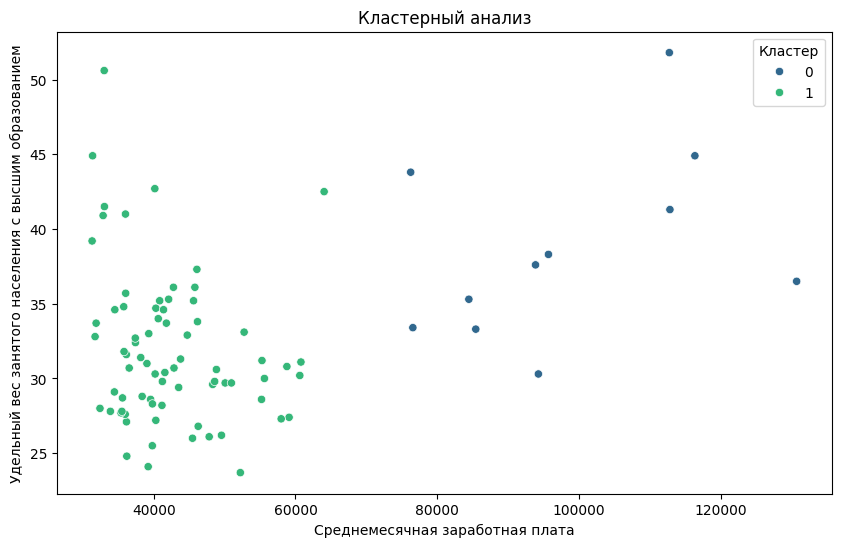

In [ ]:
# 4 Кластерный анализ
# Для кластерного анализа будем использовать только числовые данные
# Убедимся, что в данных нет NaN
cluster_data = df[['Wages', 'HighEdu', 'SecEdu', 'SecStudent', 'HighStudent', 'University']].dropna()

# Проверим, есть ли достаточно данных для кластеризации
if len(cluster_data) >= 2:
    kmeans = KMeans(n_clusters=2, random_state=42)  # Установим random_state для воспроизводимости
    df['cluster'] = kmeans.fit_predict(cluster_data)

    # Визуализация кластеров
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='Wages', y='HighEdu', hue='cluster', palette='viridis')
    plt.title('Кластерный анализ')
    plt.xlabel('Среднемесячная заработная плата')
    plt.ylabel('Удельный вес занятого населения с высшим образованием')
    plt.legend(title='Кластер')
    plt.show()
else:
    print("Недостаточно данных для кластерного анализа.")

In [ ]:
# 4 Линейный дискриминантный анализ
# Подготовка данных для LDA
X_lda = df[['HighEdu', 'SecEdu', 'SecStudent', 'HighStudent', 'University', 'Popul', 'WorkAge']].dropna()
y_lda = df['is_federal'].dropna()

# Убедимся, что X_lda и y_lda имеют одинаковую длину
X_lda = X_lda.loc[y_lda.index]  # Синхронизируем индексы

if not X_lda.empty and not y_lda.empty:
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_lda, y_lda)
    print("Коэффициенты LDA:", lda.coef_)
    print("Переменные LDA:", lda.classes_)
else:
    print("Не удалось провести Линейный дискриминантный анализ из-за недостатка данных.")

Коэффициенты LDA: [[ 0.38791858  0.20332156 -0.10031104  0.02274525  0.92557275 -0.01026481
   0.00542649]]
Переменные LDA: [0 1]


 Выводы
 1. Если p_value < 0.05 по t-тесту или U-тесту, то мы можем утверждать, что есть статистически значимые различия между группами.
 T-test:p_value=0.024893960298917883
U-test: p_value=0.15079477574162192
Следовательно различия между группами есть
 2. Регрессионный анализ покажет, насколько статус региона влияет на уровень заработной платы.

    2.1. Статус региона (федеральный или региональный): Не имеет статистически значимого влияния на уровень заработной платы в данной выборке, что может указывать на то, что другие факторы, такие как образование и структура населения, играют более важную роль.

    2.2. Образование: Уровень образования (как высшее, так и среднее профессиональное) положительно влияет на уровень заработной платы. Это подчеркивает важность образования для повышения доходов.

    2.3. Студенческое население: Увеличение числа студентов по программам высшего образования связано с уменьшением заработной платы, что может указывать на избыток выпускников на рынке труда.

    2.4. Количество университетов: Положительное влияние на заработную плату указывает на то, что наличие образовательных
 3. Кластерный анализ поможет визуализировать, как распределяются регионы по выбранным характеристикам.

 Города с федеральным значением:

  • Уровень заработной платы варьируется от 80,000 до 120,000 рублей.

 Региональные города:

  • Уровень заработной платы варьируется от 0 до 6,000 рублей.

Следовательно с ВО заработная плата выше в городах с Федеральным значением

Линейный дискриминантный анализ
Значения:

• 0.3879 для HighEdu: Положительное значение указывает на то, что увеличение доли населения с высшим образованием связано с большей вероятностью того, что город будет федеральным.

  • 0.2033 для SecEdu: Положительное значение также говорит о том, что увеличение доли населения со средним профессиональным образованием положительно влияет на вероятность того, что город будет федеральным.

  • -0.1003 для SecStudent: Негативное значение указывает на то, что увеличение числа студентов по программам среднего профессионального образования связано с меньшей вероятностью того, что город будет федеральным.

  • 0.0227 для HighStudent: Положительное значение говорит о том, что увеличение числа студентов по программам высшего образования также связано с большей вероятностью того, что город будет федеральным.

  • 0.9256 для University: Высокое положительное значение указывает на то, что увеличение числа университетов в городе значительно увеличивает вероятность того, что город будет федеральным.

  • -0.0103 и 0.0054 для Popul и WorkAge: Эти значения близки к нулю, что указывает на то, что эти переменные имеют незначительное влияние на различие между классами.